In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
#Using tensorflow's mnist fashion dataset
mnist_hw = tf.keras.datasets.fashion_mnist
#loading the data
(X_train_hw, Y_train_hw), (X_test_hw, Y_test_hw) = mnist_hw.load_data()

#Preprocess the data
##Write code here
X_train_hw = tf.keras.utils.normalize(X_train_hw, axis = 1)
X_test_hw = tf.keras.utils.normalize(X_test_hw, axis = 1)

print(X_train_hw.shape)
print(X_test_hw.shape)

(60000, 28, 28)
(10000, 28, 28)


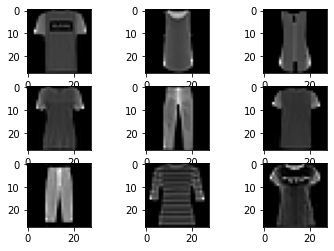

(12000, 784)
(12000,)

(2000, 784)
(2000,)


In [5]:
#filtering inputs and outputs for only digits 0 and 1
x_train_hw = []
y_train_hw = []

x_test_hw = []
y_test_hw = []
# Keeping only 0 and 1 
for i in range(len(X_train_hw)):
    ##Write code here
    if Y_train_hw[i] <= 1:
      x_train_hw.append(X_train_hw[i])
      y_train_hw.append(Y_train_hw[i])
    
for i in range(len(X_test_hw)):
    ##Write code here
    if Y_test_hw[i] <= 1:
      x_test_hw.append(X_test_hw[i])
      y_test_hw.append(Y_test_hw[i])
        
#seeing the images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train_hw[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()



# Reshaping for 1D input vector
##Write code here to reshape
x_train_hw = np.array(x_train_hw).reshape(-1,28*28)
x_test_hw = np.array(x_test_hw).reshape(-1,28*28)
y_train_hw = np.array(y_train_hw)
y_test_hw = np.array(y_test_hw)
_
print(x_train_hw.shape)
print(y_train_hw.shape)
print()
print(x_test_hw.shape)
print(y_test_hw.shape)

In [8]:
#Defining the model here
model_hw = tf.keras.Sequential([
    ##Write code here
    tf.keras.layers.Input((None,784)),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

#Compiling the model
model_hw.compile(optimizer="SGD",loss="binary_crossentropy",metrics="accuracy")
model_hw.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, None, 1)           785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Training the model
#Use 10 epochs for this
history_hw = model_hw.fit(x_train_hw,y_train_hw, epochs=10, validation_data=(x_test_hw,y_test_hw))

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3880 - accuracy: 0.9290 - val_loss: 0.2557 - val_accuracy: 0.9405
Epoch 2/10
375/375 [==============================] - 0s 1ms/step - loss: 0.2048 - accuracy: 0.9536 - val_loss: 0.1835 - val_accuracy: 0.9485
Epoch 3/10
375/375 [==============================] - 1s 1ms/step - loss: 0.1583 - accuracy: 0.9588 - val_loss: 0.1546 - val_accuracy: 0.9535
Epoch 4/10
375/375 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9632 - val_loss: 0.1385 - val_accuracy: 0.9560
Epoch 5/10
375/375 [==============================] - 1s 1ms/step - loss: 0.1225 - accuracy: 0.9661 - val_loss: 0.1278 - val_accuracy: 0.9600
Epoch 6/10
375/375 [==============================] - 1s 1ms/step - loss: 0.1131 - accuracy: 0.9682 - val_loss: 0.1200 - val_accuracy: 0.9615
Epoch 7/10
375/375 [==============================] - 1s 1ms/step - loss: 0.1060 - accuracy: 0.9693 - val_loss: 0.1140 - val_accuracy: 0.9635
Epoch 

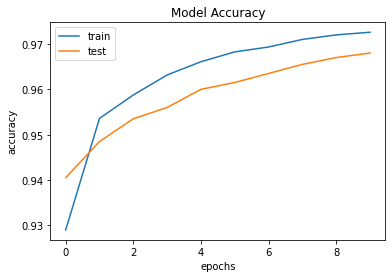

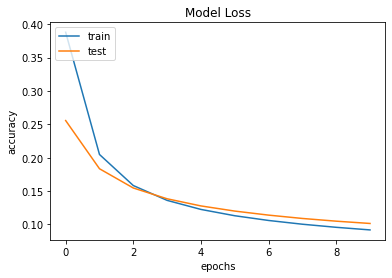

In [10]:
#plotting the model performance
plt.plot(history_hw.history['accuracy'])
plt.plot(history_hw.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history_hw.history['loss'])
plt.plot(history_hw.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()